# Comparison of Previous Critical Point Estimates

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi as π
import pandas as pd
from dgutils import colors as colortools

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# plot style
plt.style.reload_library()
plt.style.use('../include/aps.mplstyle')
figsize = plt.rcParams['figure.figsize']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [70]:
# cols = {
#  "Purple":"#B39EB5",  
#  "Lavender":"#C4C3E9",
#  "Teal":"#AEC6CF", 
#  "Cyan":"#89CFF0",
#  "Sky Blue":"#80B7DE",
#  "Blue":"#779ECB", 
#  "Red":"#FF6961", 
#  "Coral":"#FF9AA2",
#  "Sandy Brown":"#F4A460",
#  "Orange":"#FFB347",
#  "Brown":"#D1A677",
#  "Taupe":"#D3B3A6",
#   "Green":"#77DD77",
#  "Magenta":"#CFCFC4",
#  "Olive":"#B2B982",
#  "Orchid":"#DA70D6",
#  "Light Pink":"#FFB6C1",
#  "Black":"#000000"}

cols = {
    "Purple":       "#B39EB5",
    "Lavender":     "#C4C3E9",
    "Teal":         "#AEC6CF",
    "Cyan":         "#89CFF0",
    "Sky Blue":     "#80B7DE",
    "Blue":         "#779ECB",
    "Coral":        "#FF9AA2",
    "Sandy Brown":  "#F4A460",
    "Orange":       "#FFB347",
    "Brown":        "#D1A677",
    "Taupe":        "#D3B3A6",
    "Green":        "#77DD77",
    "Magenta":      "#CFCFC4",
    "Olive":        "#B2B982",
    "Orchid":       "#DA70D6",
    "Light Pink":   "#FFB6C1", 
    "Slate Blue":   "#6A5ACD",
    "Periwinkle":   "#C3CDE6",
    "Sage":         "#9CAF88",
    "Seafoam":      "#8FD3B7",
    "Forest Green": "#228B22",
    "Navy":         "#34495E",
    "Slate Gray":   "#708090", 
    "Terracotta":   "#E2725B",
    "Mustard":      "#D2B55B",
    "Moss":         "#8A9A5B",
    "Burgundy":     "#800020",
    "Rust":         "#B7410E",
    "Ocher":        "#CC7722",
    "Mauve":        "#E0B0FF",
    "Dusty Rose":   "#DCAE96",
    "Clay":         "#B66E41", 
    "Black":        "#000000",
    "Red":          "#FF6961"
}

cols_list = list(cols.values())

markers_all = ['o','s','d','p','h','o','^','>','v','<','D','P',"<","1","2","3","4","8",".","h","H","+","x","X","d",0,1,2,3,4,5,6,7,8,9,10,11] #['o','s','d','p','h','o','^','>','v','<','D','P',"*",,"|","_",0,1,2,3]

## Read in data from a `.csv` file and plot the previous predictions for $(J/U)_c$

In [71]:
df = pd.read_csv("../data/bh_critical.csv")

# Extract specific columns as NumPy arrays
year = df['Year'].to_numpy().astype(int)
JoUc = df['Estimate'].to_numpy().astype(float)
ΔJoUc = df['Error'].to_numpy().astype(float)
label = df['Reference'].tolist()

markers = markers_all[:len(year)-1][::-1]
markers.extend("*")
cols_list[len(year)-1] = "#FF6961"

C:\Users\mtham\AppData\Local\Temp\ipykernel_39496\191883965.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  ax.plot(cy,(JoUc[i]-JoUc_our)/ΔJoUc[i] , marker=markers[i], mec=cols_list[i], linestyle='None',


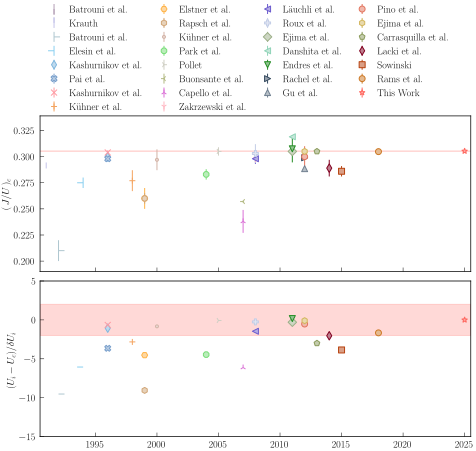

In [ ]:
from matplotlib.ticker import MultipleLocator
plt.style.reload_library()
with plt.style.context('../include/aps.mplstyle'):
    
    fig, axs = plt.subplots(2,1,figsize=(2*figsize[0],3*figsize[1]),sharex=True, sharey=False, squeeze=True,constrained_layout=True)
    ax = axs[0]
     
    for i,cy in enumerate(year): 
        ax.errorbar(cy,JoUc[i],yerr=ΔJoUc[i], marker=markers[i], mec=cols_list[i], ecolor=cols_list[i], linestyle='None',
                    mfc=colortools.get_alpha_hex(cols_list[i],0.5),elinewidth=1,barsabove=False, label=label[i], markersize=6)
    ax.set_ylim(0.19,0.339)
    ax.set_xlim(1990.5,2025.5)
    
    ax.set_ylabel(r'$(\, J/U\, )_c$')
    
    ax = axs[1]
    
    JoUc_our = JoUc[-1]
    for i,cy in enumerate(year): 
        ax.plot(cy,(JoUc[i]-JoUc_our)/ΔJoUc[i] , marker=markers[i], mec=cols_list[i], linestyle='None',
                    mfc=colortools.get_alpha_hex(cols_list[i],0.5),  label=label[i], markersize=6)
    ax.set_ylim(-15,5)
    ax.axhspan(-2,2, xmin=0.0, xmax=1.0, color=cols_list[len(JoUc)-1], alpha=0.25, zorder=-10)
    ax.set_ylabel(r'$(U_i-U_c)/\delta U_i$') 
    ax = axs[0]
    ax.legend(loc=(0.0,1.0),labelspacing=0.5,ncols=4,columnspacing=0.5,)  
    ax.axhspan(JoUc[-1]-ΔJoUc[-1],JoUc[-1]+ΔJoUc[-1], xmin=0.0, xmax=1.0, color=cols_list[len(JoUc)-1], alpha=0.25, zorder=-10)
     
    
    plt.savefig('../figures/JoUc_literature_2.pdf')

C:\Users\mtham\AppData\Local\Temp\ipykernel_39496\390826250.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  ax.plot(cy,np.abs((JoUc[i]-JoUc_our)/ΔJoUc[i] ), marker=markers[i], mec=cols_list[i], linestyle='None',


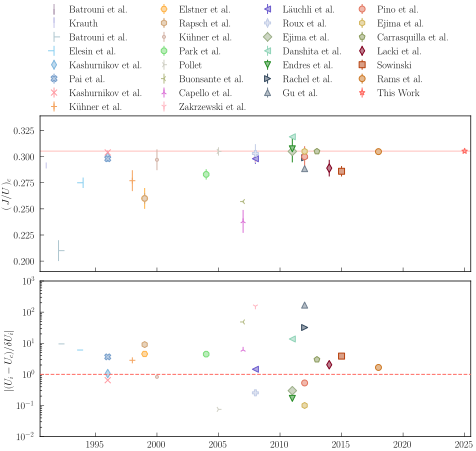

In [ ]:
from matplotlib.ticker import MultipleLocator
plt.style.reload_library()
with plt.style.context('../include/aps.mplstyle'):
    
    fig, axs = plt.subplots(2,1,figsize=(2*figsize[0],3*figsize[1]),sharex=True, sharey=False, squeeze=True,constrained_layout=True)
    ax = axs[0]
     
    for i,cy in enumerate(year): 
        ax.errorbar(cy,JoUc[i],yerr=ΔJoUc[i], marker=markers[i], mec=cols_list[i], ecolor=cols_list[i], linestyle='None',
                    mfc=colortools.get_alpha_hex(cols_list[i],0.5),elinewidth=1,barsabove=False, label=label[i], markersize=6)
    ax.set_ylim(0.19,0.339)
    ax.set_xlim(1990.5,2025.5)
    
    ax.set_ylabel(r'$(\, J/U\, )_c$')
    
    ax = axs[1]
    
    JoUc_our = JoUc[-1]
    for i,cy in enumerate(year): 
        ax.plot(cy,np.abs((JoUc[i]-JoUc_our)/ΔJoUc[i] ), marker=markers[i], mec=cols_list[i], linestyle='None',
                    mfc=colortools.get_alpha_hex(cols_list[i],0.5),  label=label[i], markersize=6)
    ax.set_ylim(0.01,1000)
    ax.set_yscale('log')
    ax.set_xlim(1990.5,2025.5)
    ax.plot([1990.5,2025.5],[1,1],color=cols_list[len(JoUc)-1], linestyle='--', linewidth=1, zorder=100) 
    ax.set_ylabel(r'$|(U_i-U_c)/\delta U_i|$')
 
    ax = axs[0]
    ax.legend(loc=(0.0,1.0),labelspacing=0.5,ncols=4,columnspacing=0.5,)  
    ax.axhspan(JoUc[-1]-ΔJoUc[-1],JoUc[-1]+ΔJoUc[-1], xmin=0.0, xmax=1.0, color=cols_list[len(JoUc)-1], alpha=0.25, zorder=-10)
     
    
    plt.savefig('../figures/JoUc_literature.pdf')